In [15]:
from ccount import *
import numpy as np
import importlib
import ccount
importlib.reload(ccount)

<module 'ccount' from '/Users/rui/Dropbox (UMass Medical School)/projects/colony_counting/ccount/scripts/mnist/ccount.py'>

In [2]:
ls *gz

large.allNeg.npy.gz    mid.strict.npy.gz      small.allNeg.npy.gz
merged.strict.npy.gz   mid.verystrict.npy.gz
mid.labeled.npy.gz     predictions.npy.gz


In [3]:
merged = load_blobs_db(in_db_name='merged.strict.npy.gz')

merged.strict.npy.gz read into RAM
2371 cropped blobs, 160000 pixcels in each blob
60 Yes, 2273 No, 38 Uncertain, 0 Unlabeled


In [4]:
merged.shape

(2371, 160006)

In [5]:
blobs_stat(merged)

60 Yes, 2273 No, 38 Uncertain, 0 Unlabeled


In [ ]:
show_rand_crops(crops=merged, label_filter=1, num_shown=60)

In [ ]:
show_rand_crops(crops=merged, label_filter=-2, num_shown=38)

# test augmentation issue on positive images
- no problem detected

In [6]:
positives = merged[merged[:, 3]==1, :]
Images, Labels, Rs = parse_blobs(positives)
w = int(Images[0].shape[0]/2)
print(w)

200


In [16]:
aug_Images = ccount.augment_images(Images)

25


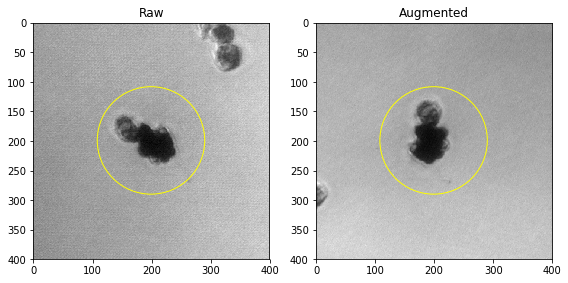

55


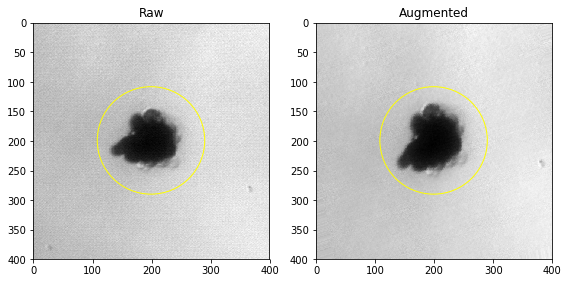

20


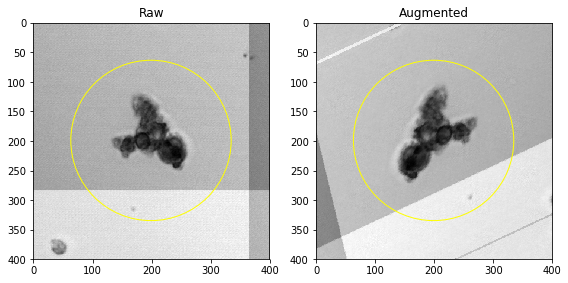

59


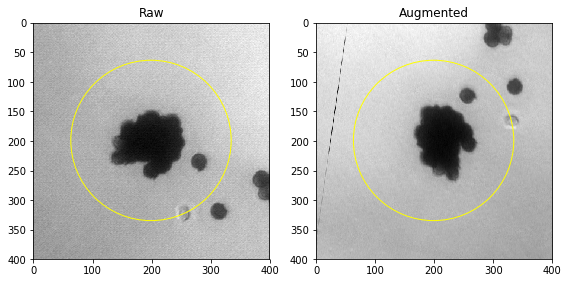

53


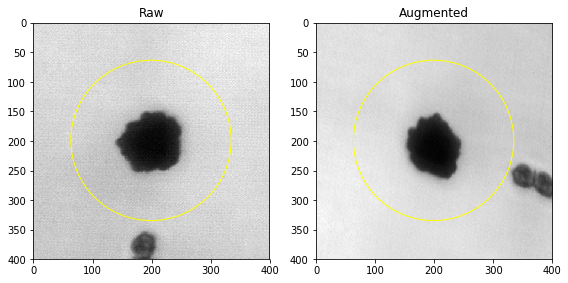

1


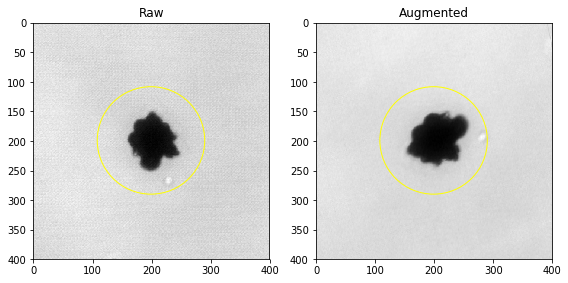

59


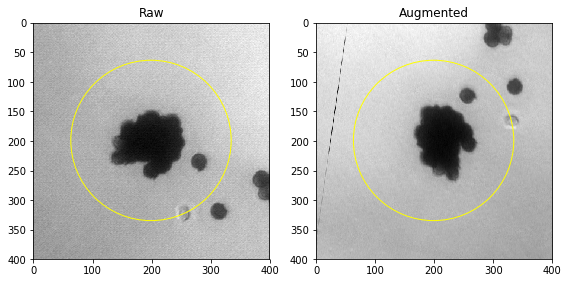

46


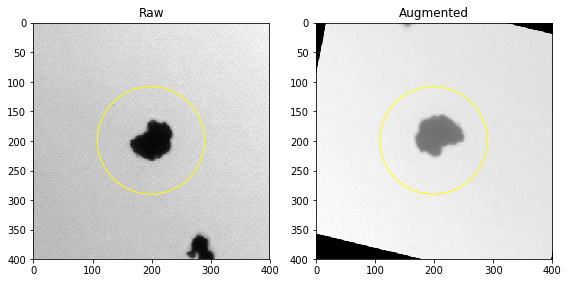

52


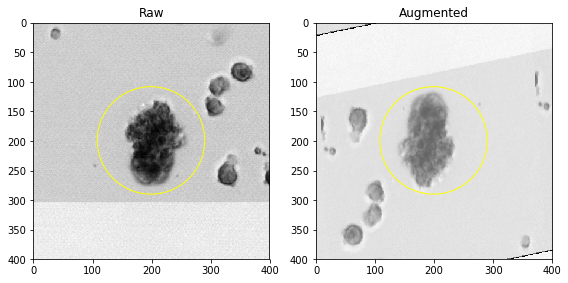

9


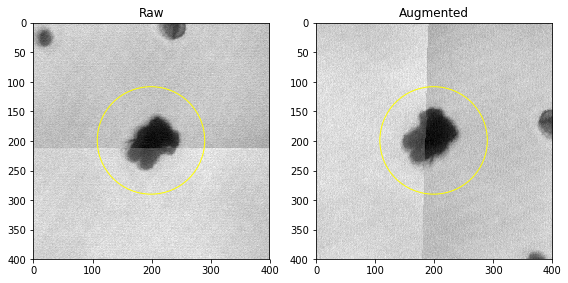

20


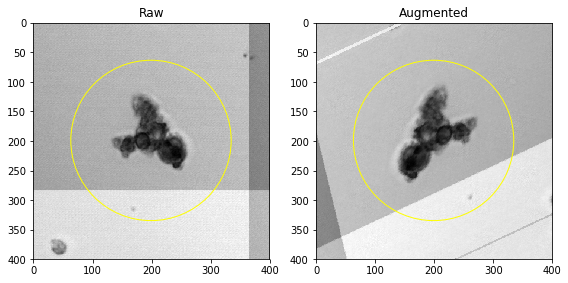

20


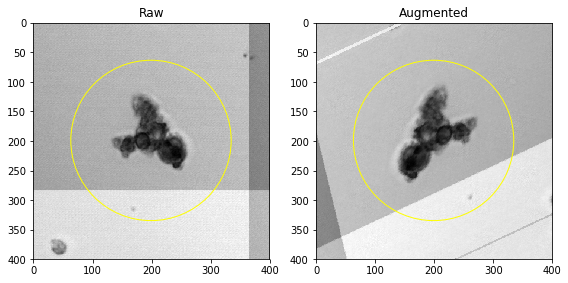

55


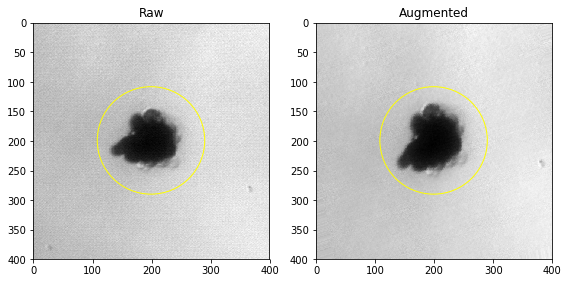

1


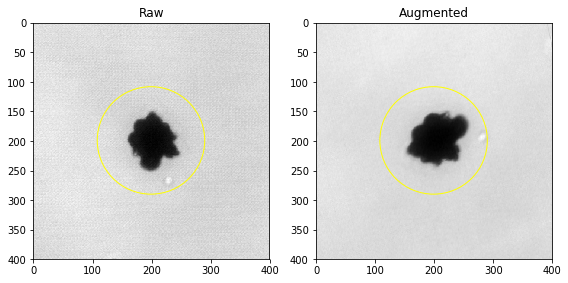

52


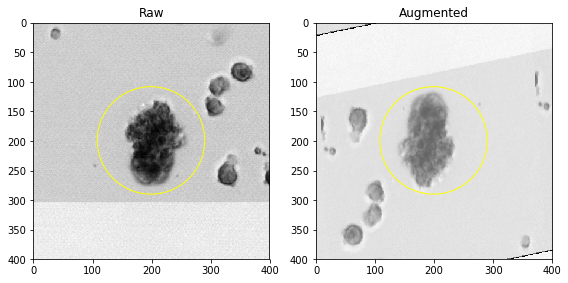

29


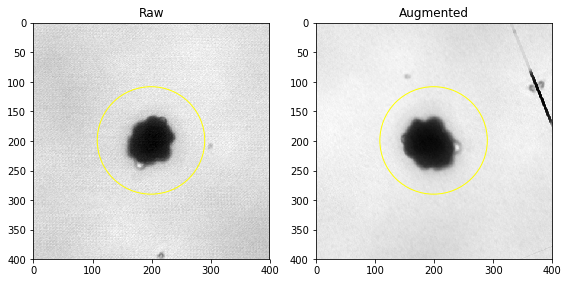

32


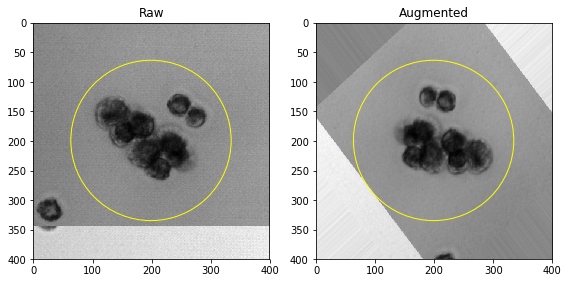

18


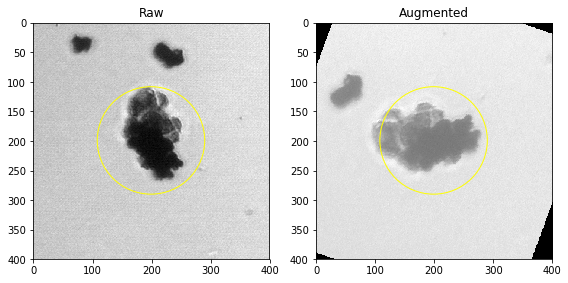

28


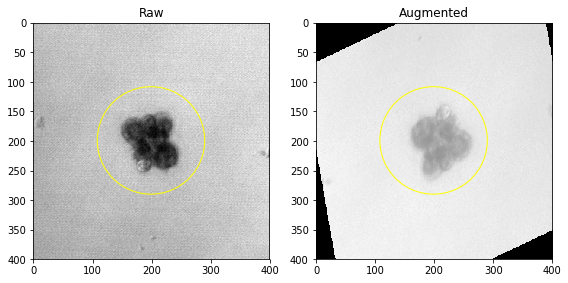

37


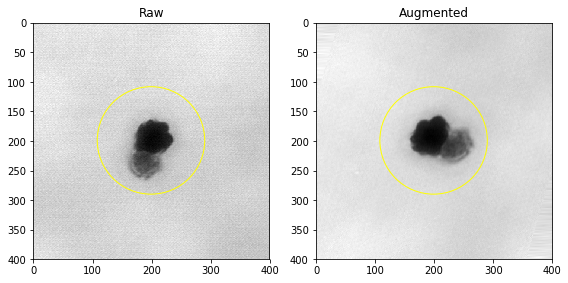

In [17]:
for i in range(20):
    i = np.random.choice(range(len(Images)))
    print(i)    
    
    fig, axes = plt.subplots(1, 2, figsize=(8, 16), sharex=False, sharey=False)
    ax = axes.ravel()
    ax[0].set_title('Raw')
    ax[0].imshow(Images[i], 'gray')
    c = plt.Circle((w - 1, w - 1), Rs[i]*1.4, color='yellow', linewidth=1, fill=False)
    ax[0].add_patch(c)
    ax[1].set_title('Augmented')
    ax[1].imshow(aug_Images[i], 'gray')
    c = plt.Circle((w - 1, w - 1), Rs[i]*1.4, color='yellow', linewidth=1, fill=False)
    ax[1].add_patch(c)
    plt.tight_layout()
    plt.show()
    plt.close()

In [ ]:
np.save('test.npy', merged[0:100])